In [ ]:
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/image_classification"

/content/drive/MyDrive/Colab Notebooks/image_classification


In [ ]:
#!pip install unrar
!unrar x image_classification.rar

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

tf.test.gpu_device_name()
device_lib.list_local_devices()
!cat /proc/meminfo
!!cat /proc/cpuinfo
!nvidia-smi
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


MemTotal:       13333596 kB
MemFree:        10452080 kB
MemAvailable:   11827196 kB
Buffers:           49016 kB
Cached:          1386212 kB
SwapCached:            0 kB
Active:          1104648 kB
Inactive:        1430300 kB
Active(anon):     948360 kB
Inactive(anon):     8552 kB
Active(file):     156288 kB
Inactive(file):  1421748 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               760 kB
Writeback:             0 kB
AnonPages:       1099780 kB
Mapped:           526524 kB
Shmem:              9160 kB
Slab:             123308 kB
SReclaimable:      76608 kB
SUnreclaim:        46700 kB
KernelStack:        4704 kB
PageTables:        10064 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666796 kB
Committed_AS:    3926252 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              968 kB
AnonHugePages:   

In [ ]:
def creat_model():
  import keras
  from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
  from keras.models import Sequential

  model = Sequential()

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(150, 150, 3)))
  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2, strides=2))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2, strides=2))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2, strides=2))
  model.add(Dropout(0.25))

  model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2, strides=2))
  model.add(Dropout(0.25))

  model.add(Conv2D(512, kernel_size=3, activation='relu'))
  model.add(Conv2D(512, kernel_size=3, activation='relu'))
  model.add(Conv2D(512, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2, strides=2))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(4096, activation='relu'))

  # the data we are using has 6 classes
  model.add(Dense(6, activation='softmax'))

  return model

In [ ]:
vgg16 = creat_model()
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
vgg16.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/image_classification/seg_train/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/image_classification/seg_test/"

train_it = datagen.flow_from_directory(train_dir, target_size=(150,150),class_mode="categorical", batch_size=64,shuffle=True,)
test_it = datagen.flow_from_directory(test_dir, target_size=(150,150),class_mode="categorical", batch_size=64,shuffle=True,)

H = vgg16.fit(train_it,batch_size=64,epochs=50,validation_data=test_it)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/50
220/220 [==============================] - 116s 475ms/step - loss: 1.7623 - accuracy: 0.2200 - val_loss: 1.3367 - val_accuracy: 0.4510
Epoch 2/50
220/220 [==============================] - 99s 451ms/step - loss: 1.1892 - accuracy: 0.5239 - val_loss: 1.2280 - val_accuracy: 0.5177
Epoch 3/50
220/220 [==============================] - 99s 450ms/step - loss: 1.0358 - accuracy: 0.5820 - val_loss: 1.0623 - val_accuracy: 0.5750
Epoch 4/50
220/220 [==============================] - 99s 450ms/step - loss: 0.9534 - accuracy: 0.6158 - val_loss: 0.9662 - val_accuracy: 0.6490
Epoch 5/50
220/220 [==============================] - 99s 450ms/step - loss: 0.9068 - accuracy: 0.6462 - val_loss: 0.8705 - val_accuracy: 0.6587
Epoch 6/50
220/220 [==============================] - 99s 450ms/step - loss: 0.8522 - accuracy: 0.6626 - val_loss: 0.8158 - val_accuracy: 0.7257
Epoch 7/50
220/220 [========================

In [ ]:
vgg16.save_weights('vgg16_trained_weights.h5')

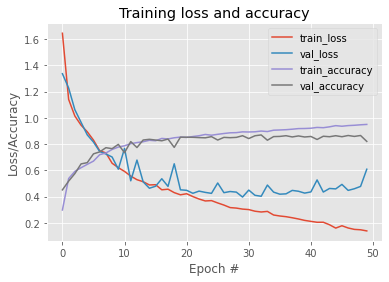

In [ ]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
predict_dir = "/content/drive/MyDrive/Colab Notebooks/image_classification/seg_pred/"

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
predict_it = datagen.flow_from_directory(predict_dir, target_size=(150,150),class_mode="categorical", batch_size=1,shuffle=False,)

score = vgg16.evaluate_generator(predict_it)

filenames = predict_it.filenames
nb_samples = len(filenames)
Y_pred = vgg16.predict_generator(predict_it,steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
aa=confusion_matrix(predict_it.classes, y_pred)

In [ ]:
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])
print('Confusion Matrix = \n',aa)

Test Loss =  0.6256765723228455
Test Accuracy =  0.8193398118019104
Confusion Matrix = 
 [[ 884   26   25   43    7  159]
 [   1 1139    7    9    4    6]
 [   2    6  955  320   42    5]
 [   3    7  100 1136   50    1]
 [   4    3   95  180  835   11]
 [  83   75   20   15   10 1033]]
